# Analysis and clustring of my spotify favorite songs

This notebook is continuation of XXX in which I covered:
1. Data gathering
2. Data preparation and exploratory analysis of my streaming history.
3. Spotify API: Adjsuting class written by XXXX. Adding extra methods for my case.

As a result from previous section I have got final data frame, which contains my songs streaming more than 5 times during last year with their audio features (dancability, lodness,..).

In this section I will focus on clustering. 
4. K-Means clustering. Finding accurate numer of clusters using elbow method.
5. Cluster visualisation using TSNE.


In [1]:
! pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\agata\anaconda3\lib\site-packages (0.11.1)


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('my_top_with_features.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'endTime', 'artistName', 'trackName', 'msPlayed',
       'counts', 'trackID', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
df = df[['artistName', 'trackName', 'counts',
        'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [6]:
df.isnull().sum()

artistName          0
trackName           0
counts              0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
dtype: int64

In [7]:
df.dropna(inplace=True)

Visualization of distirbution for each feature.

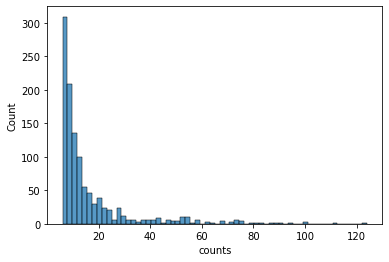

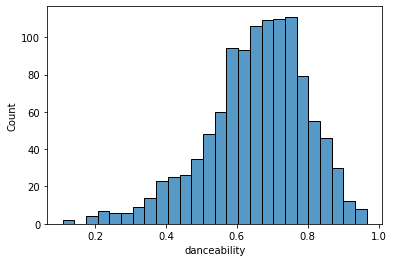

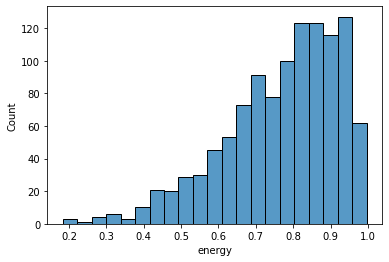

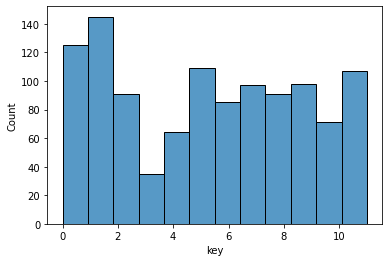

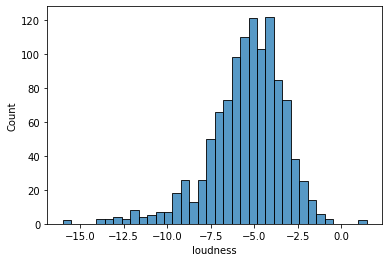

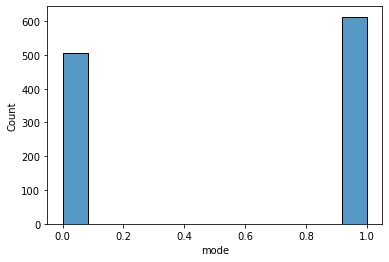

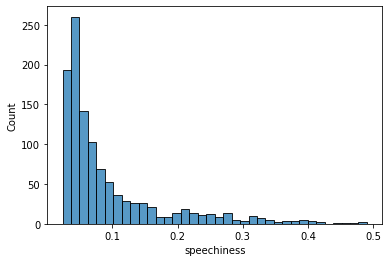

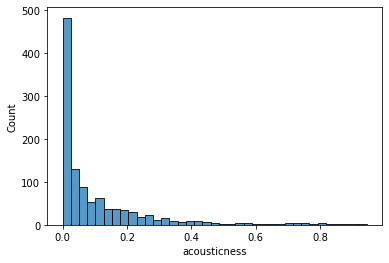

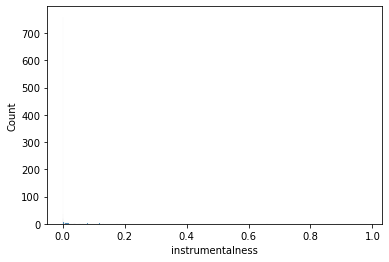

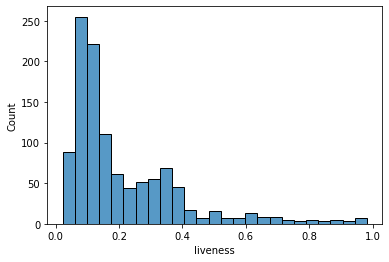

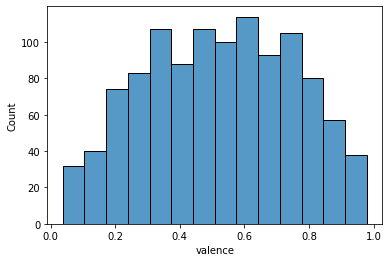

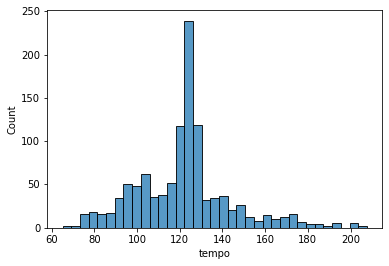

In [8]:
for i in df.describe().columns:
    sns.histplot(data=df, x=i)
    plt.show()

In [9]:
(df.artistName.value_counts()).to_frame().reset_index()

,index,artistName
0,Muse,50
1,JAY-Z,27
2,Oliver Heldens,20
3,Post Malone,19
4,Coldplay,19
...,...,...
492,Vato Gonzalez,1
493,Nelly Furtado,1
494,NEIKED,1
495,Ava Max,1


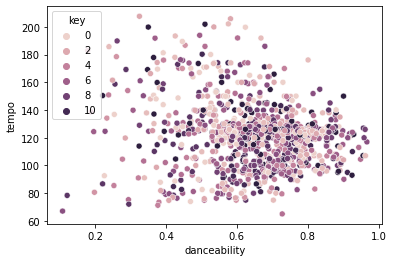

In [10]:
sns.scatterplot(data=df, x='danceability', y='tempo', hue='key')

In [11]:
X = df[['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [12]:
X = df[['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'tempo']]

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [15]:
# Create k-mean object
clt = KMeans(n_clusters=7, n_init=100)

# Train model
model = clt.fit(X_std)

In [16]:
labels = pd.Series(model.labels_)

In [17]:
labels.unique()

array([6, 1, 5, 0, 3, 4, 2])

In [18]:
df['labels'] = pd.Series(model.labels_)

In [19]:
inertions = []
num_clusters = range(2, 12)

# Populating distortions for various clusters
for i in num_clusters:
    clt = KMeans(n_clusters=i, n_init=100)
    model = clt.fit(X_std)
    inertions.append(model.inertia_)

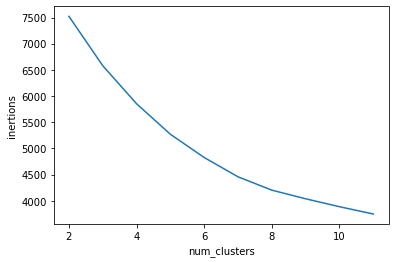

In [20]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'inertions': inertions})
sns.lineplot(x='num_clusters', y='inertions',
data = elbow_plot_data)
plt.show()

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [25]:
tsne = TSNE(n_components=2, perplexity=20)

In [26]:
data_2d = tsne.fit_transform(X_std)

In [27]:
# colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple']
colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

C:\Users\Agata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


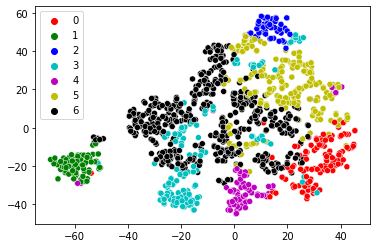

In [28]:
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels, palette=colours)

In [ ]:
df_artists = pd.read_csv('artists.csv')

In [ ]:
df_artists[df_artists['name'] == "Reinier Zonneveld"]

In [ ]:
df_artists.genres.value_counts()

In [ ]:
df_artists.drop_duplicates(inplace=True)

In [ ]:
df_genres = df.merge(df_artists, how='left', left_on='artistName', right_on='name')

In [ ]:
df_genres